
https://towardsdatascience.com/how-to-use-pairwise-correlation-for-robust-feature-selection-20a60ef7d10


In [ ]:
#command to mounte with Google drive 
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#public librabries needed for 

import numpy as np
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#librarbies needed for download csv file 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import base64
import pandas as pd
from IPython.display import HTML

#libraries needed for models we use below : 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import plot_roc_curve

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.model_selection import StratifiedShuffleSplit


**Dataset with the following notes :**

1.   All features (excluding date) will be considered 
3.   PCA feature and corrolation for reduction are not applied , not usefull


In [ ]:
#command >> Data frame to get Data from Google Drive file
data = pd.read_csv('/content/drive/MyDrive/Angham Research ML/weather_data_1.2.csv')

In [ ]:
#command to present data, check the data after connecting 
data.head()

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Rain_Today,Rain_Tomorrw
0,1/1/1979,34.375,31.379,84,18.669,9.996,0.000000,2.122197,0.678293,12.328876,0,0
1,2/1/1979,34.375,31.379,84,20.666,11.138,0.000000,3.021780,0.489818,12.470288,0,0
2,3/1/1979,34.375,31.379,84,23.203,13.161,0.000000,4.171770,0.388241,12.481140,0,0
3,4/1/1979,34.375,31.379,84,15.420,11.750,0.436020,7.827861,0.624069,4.772364,0,0
4,5/1/1979,34.375,31.379,84,12.721,10.596,0.264358,3.416941,0.657091,4.979586,0,0


In [ ]:
data.describe()

,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Rain_Today,Rain_Tomorrw
count,12987.000,1.298700e+04,12987.0,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,34.375,3.137900e+01,84.0,24.957251,16.199102,0.684108,3.770305,0.663746,20.166373,0.145684,0.145684
std,0.000,6.970693e-12,0.0,5.862796,4.683097,2.589019,1.223316,0.104707,7.419398,0.352803,0.352803
min,34.375,3.137900e+01,84.0,7.433000,3.789000,0.000000,0.748786,0.149283,0.000000,0.000000,0.000000
25%,34.375,3.137900e+01,84.0,19.880500,12.151500,0.000000,3.084272,0.624916,13.779031,0.000000,0.000000
50%,34.375,3.137900e+01,84.0,25.822000,16.367000,0.000000,3.550331,0.690719,21.191682,0.000000,0.000000
75%,34.375,3.137900e+01,84.0,29.960000,20.474500,0.051498,4.102569,0.731745,27.201708,0.000000,0.000000
max,34.375,3.137900e+01,84.0,41.579000,27.614000,56.278386,12.890847,0.922264,30.404480,1.000000,1.000000


In [ ]:
#exclude columes are not usefull, constant values , date
data_1 = data.loc[:, ~data.columns.isin(['Date','Longitude', 'Latitude','Elevation'])]
data_1.head()

,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Rain_Today,Rain_Tomorrw
0,18.669,9.996,0.000000,2.122197,0.678293,12.328876,0,0
1,20.666,11.138,0.000000,3.021780,0.489818,12.470288,0,0
2,23.203,13.161,0.000000,4.171770,0.388241,12.481140,0,0
3,15.420,11.750,0.436020,7.827861,0.624069,4.772364,0,0
4,12.721,10.596,0.264358,3.416941,0.657091,4.979586,0,0


In [ ]:
#scaling and standrization , normlization 

In [ ]:
#Divide the features and traget datasets
cols = ['Max Temperature',	'Min Temperature',	'Precipitation',	'Wind', 'Relative Humidity',	'Solar',	'Rain_Today']
X = data_1[cols]
y = data_1['Rain_Tomorrw']

In [ ]:
#divide the dataset to train & test groups by 80%,20% respectively 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

# we have 4 subsets, train dataset has two parts (x,y)
# test dataset has two parts as well(x,y)

In [ ]:
#invoke the libraries of our ML models 
lr_clf = LogisticRegression()
dt = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

#In contrast to machine learning, fitting means training. 
#There is a fit function in ML, that is used for training of model using data examples. 
#Fit function adjusts weights according to data values so that better accuracy can be achieved.

#After training, the model can be used for predictions, using .predict() method call. 

#The below is just for building the models
lr_clf.fit(X_train, y_train);
dt.fit(X_train, y_train);
rf_clf.fit(X_train, y_train);

**Evaluation and Metrics**

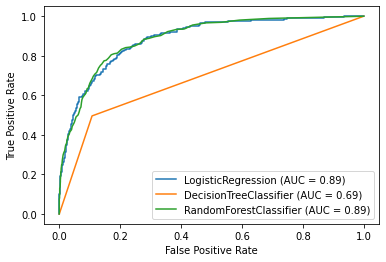

In [ ]:
#plot roc curve to show AUC for each model
#that means, take test data and check AUC vales then draw it 

disp = plot_roc_curve(lr_clf, X_test, y_test)
plot_roc_curve(dt, X_test, y_test, ax=disp.ax_);
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_);

In [ ]:
#This code for randomforst clssifier ########### cross validation  ########### 

#hyperparameters for CV
params = {
    'n_estimators': range(10, 300, 30),
    'max_depth': range(1, 10, 2),
    'min_samples_leaf': range(1, 30, 2),
    'min_samples_split': range(2, 50, 2)
}

#core code for CV
search = RandomizedSearchCV(rf_clf, params, cv=5, n_jobs=-1, random_state=42)
search.fit(X_train, y_train)

#print the best paramters after CV
print(search.best_params_)

#call the model, best_rf after CV
best_rf = search.best_estimator_

#To predict the values, use x_test by best_rf model, also 
#predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form.  
y_pred_rf = best_rf.predict(X_test)
y_predicted_prob_rf = best_rf.predict_proba(X_test)

{'n_estimators': 130, 'min_samples_split': 42, 'min_samples_leaf': 9, 'max_depth': 7}


In [ ]:
#This code is for RandomForestClassifier model metrics 

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob_rf[:,1])
roc_auc= auc(fpr, tpr)

rf_scores = pd.DataFrame({
    "Model": "Random forest",
    "precision_score": [precision_score(y_test, y_pred_rf)],
    "recall_score": [recall_score(y_test, y_pred_rf)],
    "accuracy": [best_rf.score(X_test, y_test)],
    "mean_cross_val_score": [cross_val_score(best_rf, X_train, y_train, cv=5).mean()],
    "roc_auc": [roc_auc],
    "f1_score":[f1_score(y_test, y_pred_rf, average='weighted')]   #check the last input:zero_division 
})

rf_scores.set_index(rf_scores.Model).drop(columns='Model')

,precision_score,recall_score,accuracy,mean_cross_val_score,roc_auc,f1_score
Model,,,,,,
Random forest,0.638554,0.442897,0.888376,0.879681,0.893195,0.879616


In [ ]:
#Feature importance evaluation , based on/after Cross validation :

feature_importances_df = pd.DataFrame({
    'features':list(X_train.columns), 
    'Feature_Importances': best_rf.feature_importances_},index=X_train.columns)\
    .sort_values(by='Feature_Importances')

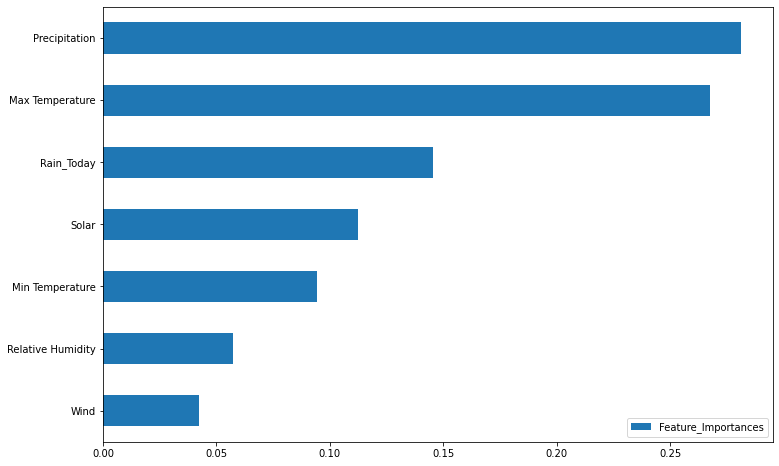

In [ ]:
#chart for the importnace,,,,,should enhance it with colores etc
feature_importances_df.tail(10).plot(kind='barh', figsize=(12, 8));

In [ ]:
#predication for Logistc regrtiions model
y_pred_lr = lr_clf.predict(X_test)
y_predicted_prob_lr = lr_clf.predict_proba(X_test)

In [ ]:
#get scores and metrics without Cross validation & estimators 

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob_lr[:,1])
roc_auc= auc(fpr, tpr)

lr_scores = pd.DataFrame({
    "Model": "Logistic Regrision",
    "precision_score": [precision_score(y_test, y_pred_lr)],
    "recall_score": [recall_score(y_test, y_pred_lr)],
    "accuracy": [best_rf.score(X_test, y_test)],
    "mean_cross_val_score": [cross_val_score(lr_clf, X_train, y_train, cv=5).mean()],
    "roc_auc": [roc_auc],
    "f1_score":[f1_score(y_test, y_pred_lr, average='weighted')]   #check the last input:zero_division 
})

lr_scores.head()


,Model,precision_score,recall_score,accuracy,mean_cross_val_score,roc_auc,f1_score
0,Logistic Regrision,0.666667,0.423398,0.888376,0.879874,0.885969,0.880463


In [ ]:
#predication for decision tree model
y_pred_dt = dt.predict(X_test)
y_predicted_prob_dt = dt.predict_proba(X_test)

In [ ]:
#get scores and metrics without Cross validation & estimators 

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob_dt[:,1])
roc_auc= auc(fpr, tpr)

dt_scores = pd.DataFrame({
    "Model": "Decision Tree",
    "precision_score": [precision_score(y_test, y_pred_dt)],
    "recall_score": [recall_score(y_test, y_pred_dt)],
    "accuracy": [best_rf.score(X_test, y_test)],
    "mean_cross_val_score": [cross_val_score(dt , X_train, y_train, cv=5).mean()],
    "roc_auc": [roc_auc],
    "f1_score":[f1_score(y_test, y_pred_dt, average='weighted')]   #check the last input:zero_division 
})

dt_scores.head()


,Model,precision_score,recall_score,accuracy,mean_cross_val_score,roc_auc,f1_score
0,Decision Tree,0.424821,0.495822,0.888376,0.835307,0.694092,0.842728


**The above Model results are without** : 

1-Feature reduction wither in corrolation or using PCA methode 

2-the Result without Date feature

3-The results without standrization

4-The results for three models:

lr = LogisticRegression()
,dt = DecisionTreeClassifier()
,rf = RandomForestClassifier()



In [ ]:
dff['Rain_Tomorrw'].value_counts()

0    11095
1     1892
Name: Rain_Tomorrw, dtype: int64

Clarficiation for cross validation : k-folds and Random split 
https://machinelearningmastery.com/k-fold-cross-validation/


**Data is normally imbalanace**[0 : 11095(85.5% of total samples), 1 : 1892(14.5% of total sample)], basiclly we should make oversampling/undersampling methods to make it like 50% / 50% and kill this problem. 

We have maily two options :
1.   **Use** undersampling and over sampling methods, then use cross validation,k-folds to estimite the ML model, that approuch beacuse k-folds say 10-K , if it take 9 folds from negative and 1 from positive, that will choose positive totally. and will ignore nigatve sample. 
but with oversamplung /undersampling that will be effisiante if sample 50 % for each one, I mean rain tomorrw. 

-In general that will not add more accurcy to the model. 

2.   **If we use normal split of dataset**, say 30% to 70% , let say 100 sample, it will take 30 sample negative and 70 postive and will not ignore negative samples. 
of course without oversampling/undersampling methods and K-folds cross validation. it usefull in applied ML. 
